# CIFAR-10 Image Classification Project
CIFAR-10 dataset includes 60,000 images spanning various object categories, segmented into 50,000 training and 10,000 testing images. The project emphasizes rigorous data preprocessing, including normalization, reshaping, and augmentation, to prepare the dataset for effective model training and to enhance the model's ability to generalize across diverse image sets.

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report
from keras.datasets import cifar10


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
import matplotlib.pyplot as plt
x_train.shape

(50000, 32, 32, 3)

In [4]:
single_image= x_train[0]
single_image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
single_image.shape

(32, 32, 3)

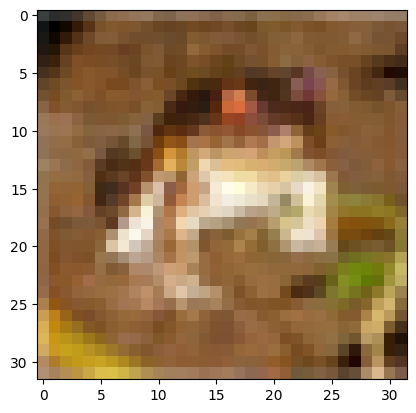

In [6]:
plt.imshow(single_image, cmap='gray')

## Data Preprocessing


In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_example= to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_example.shape


(50000, 10)

In [12]:
y_cat_train= to_categorical(y_train,10)

In [13]:
y_cat_test=to_categorical(y_test,10)


In [14]:
single_image.max()

255

In [15]:
single_image.min()

0

In [16]:
x_train= x_train/255
x_test= x_test/255

In [17]:
scaled_image=x_train[0]

In [18]:
scaled_image.max()


1.0

In [19]:
scaled_image.min()

0.0

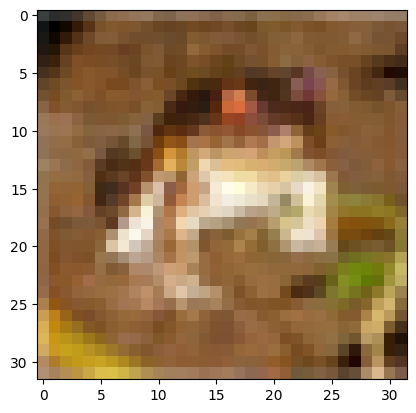

In [20]:
plt.imshow(scaled_image)

In [21]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
x_test.shape

(10000, 32, 32, 3)

#Model 1

In [23]:
model= Sequential()

model.add(Conv2D(filters=40, kernel_size=(3,3), input_shape= (32,32,3), activation= 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, activation= 'relu'))

model.add(Dense(10, activation='softmax'))

In [24]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 40)        1120      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 40)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9000)              0         
                                                                 
 dense (Dense)               (None, 128)               1152128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1154538 (4.40 MB)
Trainable params: 1154538 (4.40 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [26]:
model.fit (x_train,y_cat_train, epochs=5) #training model for 5 Epochs on training labels

Epoch 1/5
1563/1563 [==============================] - 61s 38ms/step - loss: 1.5117 - accuracy: 0.4654
Epoch 2/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1800 - accuracy: 0.5858
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0522 - accuracy: 0.6354
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9629 - accuracy: 0.6653
Epoch 5/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8832 - accuracy: 0.6953


In [27]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0779 - accuracy: 0.6318


[1.0778768062591553, 0.6317999958992004]

In [30]:
import numpy as np
# predictions on test set
predictions= model.predict(x_test)
prediction_classes= np.argmax(predictions, axis=1)

313/313 [==============================] - 5s 15ms/step


In [31]:
#model classification report
report= classification_report(y_test, prediction_classes) # model classification report
print(report)

              precision    recall  f1-score   support

           0       0.71      0.56      0.62      1000
           1       0.73      0.80      0.76      1000
           2       0.49      0.53      0.51      1000
           3       0.43      0.54      0.48      1000
           4       0.66      0.49      0.57      1000
           5       0.55      0.52      0.53      1000
           6       0.75      0.68      0.71      1000
           7       0.73      0.69      0.71      1000
           8       0.61      0.87      0.71      1000
           9       0.80      0.65      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.63     10000
weighted avg       0.65      0.63      0.63     10000



# Model 2

In [32]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout


In [43]:
model = Sequential()

# Adding Batch Normalization and more filters
model.add(Conv2D(filters=40, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [44]:
# Using Adam optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
model.fit (x_train,y_cat_train, epochs=4 , batch_size = 32)

Epoch 1/4
1563/1563 [==============================] - 113s 72ms/step - loss: 1.2874 - accuracy: 0.5507
Epoch 2/4
1563/1563 [==============================] - 109s 70ms/step - loss: 0.9179 - accuracy: 0.6785
Epoch 3/4
1563/1563 [==============================] - 109s 70ms/step - loss: 0.7602 - accuracy: 0.7348
Epoch 4/4
1563/1563 [==============================] - 107s 68ms/step - loss: 0.6304 - accuracy: 0.7801


In [46]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 12s 34ms/step - loss: 0.9373 - accuracy: 0.6820


[0.9373105764389038, 0.6819999814033508]

In [47]:
# predictions on test set
predictions= model.predict(x_test)
prediction_classes= np.argmax(predictions, axis=1)

313/313 [==============================] - 6s 19ms/step


In [48]:
#model classification report
report= classification_report(y_test, prediction_classes) # model classification report
print(report)

              precision    recall  f1-score   support

           0       0.60      0.83      0.70      1000
           1       0.77      0.85      0.81      1000
           2       0.56      0.55      0.55      1000
           3       0.46      0.58      0.51      1000
           4       0.66      0.65      0.65      1000
           5       0.70      0.47      0.56      1000
           6       0.73      0.80      0.76      1000
           7       0.78      0.74      0.76      1000
           8       0.88      0.67      0.76      1000
           9       0.85      0.68      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



# Model 3

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [50]:
model_2 = Sequential()

model_2.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

# Flattening and dense layers
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))


In [51]:
# Compile the model
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [53]:
model_2.fit(x_train, y_cat_train, epochs=6, batch_size=32)

Epoch 1/6
1563/1563 [==============================] - 220s 139ms/step - loss: 1.8765 - accuracy: 0.3125
Epoch 2/6
1563/1563 [==============================] - 211s 135ms/step - loss: 1.5427 - accuracy: 0.4402
Epoch 3/6
1563/1563 [==============================] - 213s 136ms/step - loss: 1.3940 - accuracy: 0.5020
Epoch 4/6
1563/1563 [==============================] - 213s 136ms/step - loss: 1.2879 - accuracy: 0.5481
Epoch 5/6
1563/1563 [==============================] - 260s 166ms/step - loss: 1.2094 - accuracy: 0.5772
Epoch 6/6
1563/1563 [==============================] - 214s 137ms/step - loss: 1.1543 - accuracy: 0.5994


In [54]:
model_2.evaluate(x_test,y_cat_test)

313/313 [==============================] - 10s 32ms/step - loss: 0.9393 - accuracy: 0.6736


[0.939307689666748, 0.6736000180244446]

In [55]:
# predictions on model_2 test set
predictions= model_2.predict(x_test)
prediction_classes= np.argmax(predictions, axis=1)

313/313 [==============================] - 9s 30ms/step


In [56]:
#model_2 classification report
report= classification_report(y_test, prediction_classes) # model classification report
print(report)

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1000
           1       0.85      0.76      0.80      1000
           2       0.57      0.53      0.55      1000
           3       0.43      0.50      0.46      1000
           4       0.62      0.63      0.62      1000
           5       0.55      0.57      0.56      1000
           6       0.76      0.78      0.77      1000
           7       0.76      0.69      0.73      1000
           8       0.77      0.81      0.79      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.68     10000
weighted avg       0.68      0.67      0.68     10000



Three distinct models were run with varying architectures and optimization strategies. The first model employs a simple Convolutional Neural Network (CNN) architecture, reaching a test accuracy of 63.18%. The second model integrates Batch Normalization and more filters, achieving a higher test accuracy of 68.20%. The third model further incorporates Dropout for regularization, alongside Batch Normalization and increased filter counts, but achieves a slightly lower accuracy of 67.36% compared to the second. Based on the test accuracies, the second model, with its advanced features like Batch Normalization and an optimized number of filters, performed the best among the three.